# Reconstructing $D$ mesons

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Mesons.
</ul>

To prepare for this activity, you should already have looked at the activity on <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/ACTIVITY_dimuon_spectrum.ipynb">how to reconstruct particles from their decay products</a> and <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/hello_CLEO.ipynb">how to interface with CLEO data</a>.

After you are familiar with those activities, use the <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/download_more_data.ipynb">download-more-data notebook</a> and grab the Monte Carlo file that simulates the following decay:

$$D^+ \rightarrow K^- \pi^+ \pi^+$$ 
Also grab the CLEO data file. 

Your challenge is to reconstruct the $D^+$ meson in the Monte Carlo and then go to the data and see if you can find the $D^+$ in the same decay mode. Things to think about:

* Make sure you deal with all possible $K\pi\pi$ combinations.
* How much background is there under the peak in the data? How might you eliminate it? Can you eliminate all of it?
* Is there "structure" in the $K\pi$ systems? That is, when you plot the invariant mass of the $K\pi$ system, do you see any peaks?
* Can you make a <a href="https://en.wikipedia.org/wiki/Dalitz_plot">Dalitz</a> <a href="http://www2.warwick.ac.uk/fac/sci/physics/staff/academic/gershon/talks/gershon-BadHonnef.pdf">plot</a> for this decay mode?
* Can you find the other decay modes in the data that you have MC for? 

Have fun and good luck!

$D^+$ are the lightest particles containing charm quarks
* Made up of a charm and anti-down quark
* Mass = 1.87 GeV

$K^-$ is the anti-particle of the Kaon or K Meson
* Made up of an anti-up and an strange quark (Anti-quark + quark = MESON)
* Mass = 0.494 GeV

$\pi^+$ is a pion or pi meson
* Made up of an up and anti-down quark
* Mass = 0.1395 GeV

Dalitz Plot
* x-axis is square of m1 + m2
* y-axis is square of m2 + m2 or 2*m2 (Because there are two pions)

In [1]:
import sys
sys.path.append("../tools/")
import numpy as np
import cms_tools
import cleo_tools as cleo
import matplotlib.pyplot as plt
%matplotlib inline

infile = open("../data/Single_D0B_to_KK_ISR_LARGE.dat")
infile1 = open("../data/small_CLEO_test_file.dat")

print "Reading in the data...."
collisions_mc = cleo.get_collisions(infile)
collisions_cleo = cleo.get_collisions(infile1)

print len(collisions_mc)
print len(collisions_cleo)

Reading in the data....
9715
101


In [2]:
from math import sqrt
def mass(E,px,py,pz):
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)

[0.40098, 0.400999, 0.077917, 0.0779299]

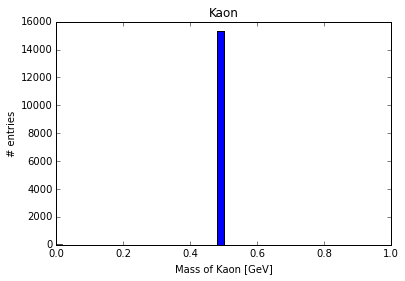

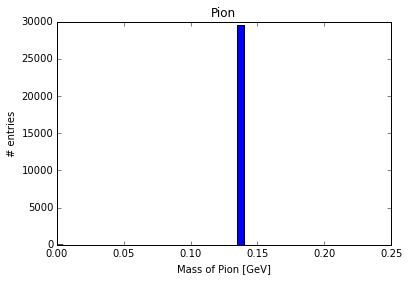

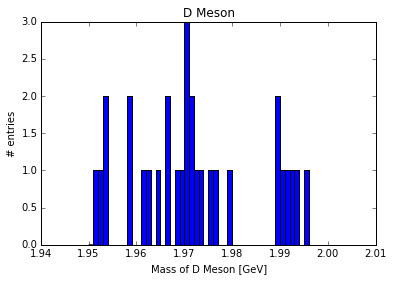

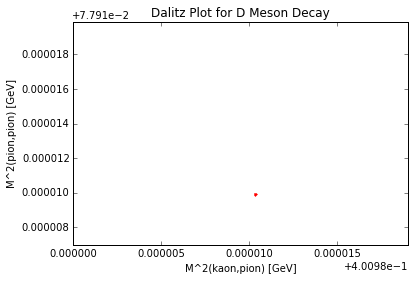

In [33]:
nkaons = []
npions = []
kaons_mass = []
pions_mass = []
d_meson_mass = []

for collision_mc in collisions_mc:
    
    pions,kaons,muons,electrons,photons = collision_mc
    
    nkaon=len(kaons)
    nkaons.append(nkaon)
    
    npion=len(pions)
    npions.append(npion)
    
    for kaon in kaons:
        E,px,py,pz,q = kaon[0:5]
        m1 = mass(E,px,py,pz)
        kaons_mass.append(m1)
    
    for pion in pions:
        E,px,py,pz,q = pion[0:5]
        m2 = mass(E2,px2,py2,pz2)
        pions_mass.append(m2)
    
    if nkaon == 1 and npion == 2:
        E0,px0,py0,pz0,charge0,sigpi0,sigka0,likpi0,likka0,nphopi0,nphoka0,depthmu0,cluster_energy0=kaons[0]
        E1,px1,py1,pz1,charge1,sigpi1,sigka1,likpi1,likka1,nphopi1,nphoka1,depthmu1,cluster_energy1=pions[0]
        E2,px2,py2,pz2,charge2,sigpi2,sigka2,likpi2,likka2,nphopi2,nphoka2,depthmu2,cluster_energy2=pions[1]
        
        E3 = E0 + E1 + E2
        px3 = px0 + px1 + px2
        py3 = py0 + py1 + py2
        pz3 = pz0 + pz1 + pz2
        
        m3 = mass(E3,px3,py3,pz3)
        d_meson_mass.append(m3)
        
    # Dalitz Plot
    x_values = []
    y_values = []
    
    x = (m1 + m2)**2
    y = (2*m2)**2
    
    x_values.append(x)
    y_values.append(y)
    
    #print x_values
    #print y_values
    
plt.figure()
plt.hist(kaons_mass,bins=50,range=(0,1)) # Why does the range function change the mass that is graphed?
plt.xlabel('Mass of Kaon [GeV]')
plt.ylabel('# entries')
plt.title("Kaon")

plt.figure()
plt.hist(pions_mass,bins=50,range=(0,0.25))
plt.xlabel('Mass of Pion [GeV]')
plt.ylabel('# entries')
plt.title("Pion")

plt.figure()
plt.hist(d_meson_mass,bins=50,range=(1.95,2))
plt.xlabel('Mass of D Meson [GeV]')
plt.ylabel('# entries')
plt.title("D Meson")

plt.figure()
plt.plot(x_values,y_values,'r.')
plt.xlabel("M^2(kaon,pion) [GeV]")
plt.ylabel("M^2(pion,pion) [GeV]")
plt.title("Dalitz Plot for D Meson Decay")
plt.axis([0.400980,0.400999,0.0779170,0.0779299])

In [4]:
# Lists within lists that represent how many times something is in the first list

print "# of pions:     %d" % (len(collisions_mc[0][0])) 
print "# of kaons:     %d" % (len(collisions_mc[0][1]))
print "# of muons:     %d" % (len(collisions_mc[0][2]))
print "# of electrons: %d" % (len(collisions_mc[0][3]))
print "# of photons:   %d" % (len(collisions_mc[0][4]))

# of pions:     4
# of kaons:     2
# of muons:     0
# of electrons: 0
# of photons:   14
